In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import scipy.stats as stats



In [78]:
#importin files
train=pd.read_csv("~/Downloads/titanic/train.csv")
test= pd.read_csv("~/Downloads/titanic/test.csv")
submission=pd.read_csv("~/Downloads/titanic/gender_submission.csv")

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


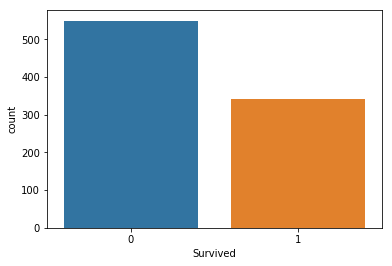

In [82]:
sns.countplot(train.Survived)

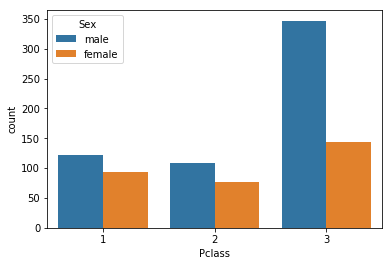

In [86]:
sns.countplot(train.Pclass,hue="sex",data=train)

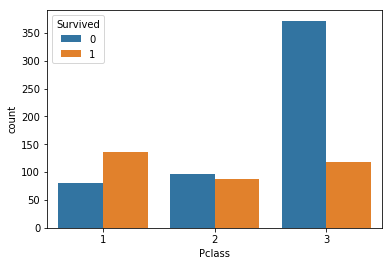

In [87]:
sns.countplot(train.Pclass,hue="Survived",data=train)

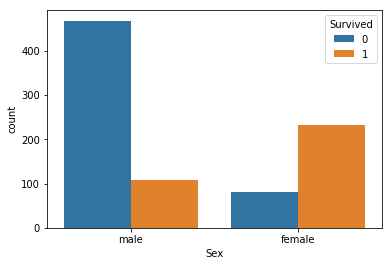

In [89]:
sns.countplot(train.Sex,hue=train.Survived)

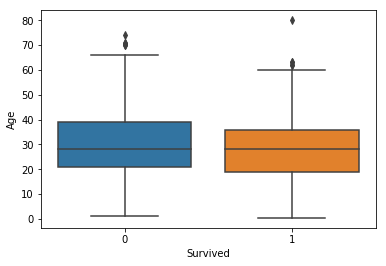

In [90]:
sns.boxplot(x=train.Survived,y=train.Age)

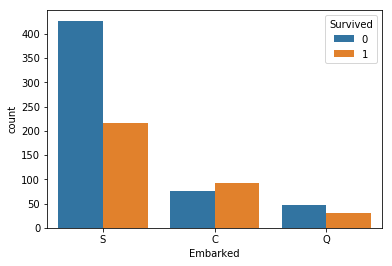

In [91]:
sns.countplot(train.Embarked,hue=train.Survived)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,15.000000,15.000000,15.000000,7.000000,15.0,15.0,15.0
mean,516.400000,0.066667,1.933333,35.142857,0.0,0.0,0.0
std,225.808958,0.258199,0.798809,10.023781,0.0,0.0,0.0
min,180.000000,0.000000,1.000000,19.000000,0.0,0.0,0.0
25%,290.500000,0.000000,1.000000,30.500000,0.0,0.0,0.0
50%,482.000000,0.000000,2.000000,38.000000,0.0,0.0,0.0
75%,704.000000,0.000000,2.500000,39.500000,0.0,0.0,0.0
max,823.000000,1.000000,3.000000,49.000000,0.0,0.0,0.0


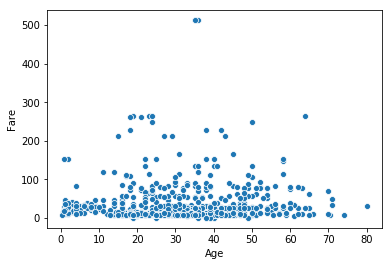

In [102]:
sns.scatterplot(train.Age,train.Fare)
train[train.Fare==0].describe()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


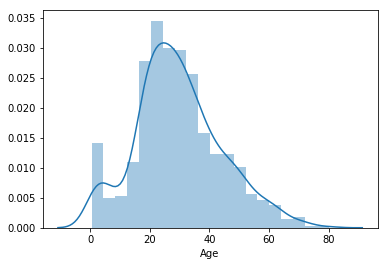

In [114]:
a=train[pd.notnull(train.Age)]
a.Age
sns.distplot(a.Age)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


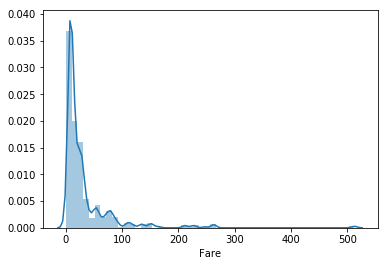

In [115]:
sns.distplot(train.Fare)

In [117]:
#removing unwanted columns from test and train
train.drop(["PassengerId","Cabin","Ticket"],axis=1,inplace=True)
test.drop(["PassengerId","Cabin","Ticket"],axis=1,inplace=True)

In [127]:
#feature engineering in name column
new=train.Name.str.split(" ",n=2,expand=True)
train["Name"]=new[1]
new1=test.Name.str.split(" ",n=2,expand=True)
test["Name"]=new1[1]


In [153]:
def impute(cols):
    Name=cols[0]
    Age=cols[1]
    if pd.isnull(Age):
        if (Name=="Master."):
            return 4
        elif(Name=="Mr."):
            return 32
        elif(Name=="Miss."):
            return 21
        elif(Name=="Mrs."):
            return 36
    else:
        return Age

#filling null values in age 
train.Age=train[["Name","Age"]].apply(impute,axis=1)
test.Age=test[["Name","Age"]].apply(impute,axis=1)

#filling null values in embarked
train.Embarked.fillna("S",inplace=True)
test.Embarked.fillna("S",inplace=True)
            
train.Age.fillna(train.Age.mean(),inplace=True)
test.Age.fillna(test.Age.mean(),inplace=True)
test.Fare.fillna(12,inplace=True)

In [144]:
test.Embarked.mode()

0    S
dtype: object

In [154]:
print(train.isnull().sum())
print(test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [208]:
train_copy=train
test_copy=test

In [216]:
train.Name.value_counts()

Mr.        502
Miss.      179
Mrs.       121
others      49
Master.     40
Name: Name, dtype: int64

In [221]:
train.Name.value_counts()

Mr.        502
Miss.      179
Mrs.       121
others      49
Master.     40
Name: Name, dtype: int64

In [214]:
train.Name.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [215]:
train.Name.replace(to_replace=[['Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,']],value='others',inplace=True)


In [219]:
test.Name.replace(to_replace=[['Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,','Palmquist,','Brito,',"Khalil,"]],value='others',inplace=True)

# preprocessing dataset

In [225]:
#gettind dummies
newtrain=pd.get_dummies(train)
newtest=pd.get_dummies(test)

In [228]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [234]:
x=pd.DataFrame(sc.fit_transform(newtrain.drop("Survived",axis=1)))
y=newtrain.Survived
scaled_test=pd.DataFrame(sc.fit_transform(newtest))


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
print(x.shape)
print(y.shape)
print(scaled_test.shape)

# fitting in decision tree

In [246]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dtree



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [247]:
treemodel=dtree.fit(x,y).predict(scaled_test)

In [249]:
(pd.DataFrame({"PassengerId":submission.PassengerId,
             "Survived":treemodel})).to_csv("titanic_submis",index=False)

# random forest technique

In [255]:
from sklearn.ensemble import RandomForestClassifier
radfor=RandomForestClassifier(bootstrap=True, class_weight=None, criterion="entropy",
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [256]:
forest=radfor.fit(x,y).predict(scaled_test)

In [258]:
(pd.DataFrame({"PassengerId":submission.PassengerId,
             "Survived":forest})).to_csv("titanic_submis",index=False)